In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Configuración inicial
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')

# Cargar datos
train =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final/test.csv')


# Limpiar nombres de columnas (eliminar comillas)
train.columns = train.columns.str.strip().str.strip("'")
test.columns = test.columns.str.strip().str.strip("'")

# Verificar estructura
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nTrain columns dtypes:\n", train.dtypes.value_counts())

Train shape: (7000, 90)
Test shape: (657, 89)

Train columns dtypes:
 object     83
int64       5
float64     2
Name: count, dtype: int64


In [ ]:
train.head()

,Id,Gas_Connection,Fireplace,Entrance_Hall,Kitchenette,Equipped,Garage_Type,Furnished,Drainage,Telephone,Guest_Bathroom,BBQ_Area,Living_Room,Nearby_Parks,Solarium,Commercial_Use,Province,Internal_Garden,Garages,Electricity,Patio,Children_Playground,Type,Number_Bathrooms,Green_Areas,Electric_Doorman,Construction_Area_m2,Intercom,Near_Sea,Sauna,Cinema_Room,Cleaning_Service,Terrace,Construction_Area,Sports_Area,Security_System,Location,Water_Heater,Professional_Use,Match,Club_House,Internal_Park,Laundry_Room,Nearby_Schools,Balcony,Attic,Oceanfront,Security_Guard,Natural_Light,Swimming_Pool,Electric_Fence,Advertiser,Air_Conditioning,Hall,Nearby_Shopping_Centers,Kitchen,Water,Basement,Independent_Bathroom,Walk_in_Closet,Age,Number_Floors,Daily_Dining_Room,Grill,Closet,Publication_Date,Internet,Sauna_Area,Bedrooms,Pets,Kitchen_with_Cabinets,Service_Room,Garden,Storage_Room,Beach_Resort,Cable,Gym,Jacuzzi,Independent_Entrance,Handicap_Access,Dining_Room,Office,Total_Area_m2,Heating,District,Daycare,Property_Condition,Internet_Room,Service_Bathroom,Price
0,0,1,Not specified,0,0,Not specified,Paralelas,Not specified,Not specified,0,0,0,0,1,0,Not specified,Lima,0,1,1,0,0,Casa,4,0,Not specified,142,Not specified,0,Not specified,0,0,0,142.00 m2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210000
1,1,0,1,Not specified,0,0,Paralelas,0,0,0,1,Not specified,0,Not specified,Not specified,Not specified,Lima,0,2,1,0,Not specified,Casa,5,Not specified,0,480,0,Not specified,0,Not specified,0,0,480.00 m2,Not specified,1,LaMolina-Lima,0,Not specified,0.0,Not specified,Not specified,0,Not specified,1,1,Not specified,0,Luminoso,Not specified,0,CLC INMOBILIARIA,0,0,Not specified,1,1,0,0,0,3,2.0,1,1,0,Publicado el 04.09.19,0,Not specified,3,Si,1,1,Not specified,0,Nulo,0,Not specified,0,Not specified,Not specified,1,0,311,0,LaMolina,Not specified,Bueno,Not specified,1,660000
2,2,Not specified,Not specified,1,0,Not specified,Lineales,Not specified,Not specified,Not specified,0,0,1,Not specified,0,Not specified,Lima,0,4,Not specified,0,0,Casa,3,0,Not specified,400,Not specified,Not specified,Not specified,0,Not specified,1,400.00 m2,0,Not specified,LaMolina-Lima,Not specified,Not specified,0.0,0,0,1,Not specified,0,0,Not specified,Not specified,Not specified,1,Not specified,No disponible,Not specified,1,Not specified,1,Not specified,0,0,0,2,2.0,1,Not specified,0,Publicado el 01.08.19,Not specified,0,3,Si,Not specified,1,1,0,Nulo,Not specified,0,Not specified,Not specified,Not specified,1,1,1400,Not specified,LaMolina,0,Bueno,0,1,1500000
3,3,0,1,Not specified,0,0,Separadas,0,0,0,1,Not specified,0,1,Not specified,No,Lima,0,2,1,0,Not specified,Casa,4,Not specified,0,420,0,0,0,Not specified,0,0,420.00 m2,Not specified,1,SanIsidro-Lima,1,No,0.0,Not specified,Not specified,0,1,1,0,0,1,Muy luminoso,Not specified,0,Margarita Ponce de Leon,0,0,1,1,1,0,0,0,4,2.0,1,0,0,Publicado el 12.08.19,1,Not specified,4,Si,1,1,Not specified,1,Nulo,1,Not specified,0,0,0,1,0,317,0,SanIsidro,Not specified,Remodelado,Not specified,1,1100000
4,4,0,Not specified,Not specified,0,Not specified,Lineales,Not specified,Not specified,0,0,Not specified,0,1,Not specified,Si,Lima,0,1,1,1,Not specified,Casa,1,Not specified,Not specified,120,Not specified,0,Not specified,Not specified,0,0,120.00 m2,Not specified,0,VillaMariaDelTriunfo-Lima,Not specified,Not specified,0.0,Not specified,Not specified,0,1,0,0,0,0,Not specified,Not specified,Not specified,REMAX Alliance PerÃº,Not specified,0,1,0,1,0,0,0,1,2.0,0,Not specified,0,Publicado el 02.08.19,0,Not specified,1,Si,Not specified,0,Not specified,0,Nulo,0,Not specified,Not specified,0,0,0,0,246,Not specified,VillaMariaDelTriunfo,Not specified,Regular,Not specified,0,110000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       7000 non-null   int64  
 1   Gas_Connection           7000 non-null   object 
 2   Fireplace                7000 non-null   object 
 3   Entrance_Hall            7000 non-null   object 
 4   Kitchenette              7000 non-null   object 
 5   Equipped                 7000 non-null   object 
 6   Garage_Type              7000 non-null   object 
 7   Furnished                7000 non-null   object 
 8   Drainage                 7000 non-null   object 
 9   Telephone                7000 non-null   object 
 10  Guest_Bathroom           7000 non-null   object 
 11  BBQ_Area                 7000 non-null   object 
 12  Living_Room              7000 non-null   object 
 13  Nearby_Parks             7000 non-null   object 
 14  Solarium                

In [ ]:
#@title Análisis de valores faltantes

# Identificar columnas con valores faltantes
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

print("Columnas con valores faltantes en train:")
print(missing_train[missing_train > 0])
print("\nPorcentaje de valores faltantes en train:")
print((missing_train[missing_train > 0] / len(train)).round(2))

Columnas con valores faltantes en train:
Location                   495
Water_Heater               495
Professional_Use           495
Match                      495
Club_House                 495
Internal_Park              495
Laundry_Room               495
Nearby_Schools             495
Balcony                    495
Attic                      495
Oceanfront                 495
Security_Guard             495
Natural_Light              495
Swimming_Pool              495
Electric_Fence             495
Advertiser                 495
Air_Conditioning           498
Hall                       495
Nearby_Shopping_Centers    495
Kitchen                    495
Water                      495
Basement                   495
Independent_Bathroom       495
Walk_in_Closet             495
Age                        495
Number_Floors              495
Daily_Dining_Room          495
Grill                      495
Closet                     495
Publication_Date           495
Internet                   49

In [ ]:
#@title Inspección de columnas sospechosas (numéricas almacenadas como objeto)

# Columnas clave a verificar
candidate_cols = ['Age', 'Total_Area_m2', 'Bedrooms', 'Construction_Area']

for col in candidate_cols:
    if col in train.columns:
        print(f"\n--- {col} ---")
        print("Muestra de valores únicos:", train[col].dropna().unique()[:5])

        # Intentar conversión numérica
        converted = pd.to_numeric(train[col], errors='coerce')
        conversion_rate = converted.notnull().mean()
        print(f"Tasa de conversión exitosa: {conversion_rate:.1%}")
        print(f"Valores convertidos: {converted.dropna().unique()[:5]}")


--- Age ---
Muestra de valores únicos: ['3' '2' '4' '1' '6']
Tasa de conversión exitosa: 92.9%
Valores convertidos: [3. 2. 4. 1. 6.]

--- Total_Area_m2 ---
Muestra de valores únicos: ['311' '1400' '317' '246' '150']
Tasa de conversión exitosa: 92.9%
Valores convertidos: [ 311. 1400.  317.  246.  150.]

--- Bedrooms ---
Muestra de valores únicos: ['3' '4' '1' '5+' '2']
Tasa de conversión exitosa: 60.9%
Valores convertidos: [3. 4. 1. 2. 0.]

--- Construction_Area ---
Muestra de valores únicos: ['142.00 m2' '480.00 m2' '400.00 m2' '420.00 m2' '120.00 m2']
Tasa de conversión exitosa: 0.0%
Valores convertidos: []


In [ ]:
#@title Análisis de variables categóricas

# Estadísticas de cardinalidad
categorical_cols = train.select_dtypes(include='object').columns
cat_analysis = pd.DataFrame({
    'Columna': categorical_cols,
    'Valores_únicos': [train[col].nunique() for col in categorical_cols],
    'Valores_faltantes': [train[col].isnull().sum() for col in categorical_cols]
}).sort_values('Valores_únicos', ascending=False)

print("Top 10 columnas categóricas con más categorías:")
print(cat_analysis.head(10))

Top 10 columnas categóricas con más categorías:
              Columna  Valores_únicos  Valores_faltantes
76      Total_Area_m2            1121                497
29  Construction_Area            1003                  0
46         Advertiser             646                495
59   Publication_Date             160                495
32           Location             156                495
78           District             155                497
68       Beach_Resort             112                497
77            Heating              30                497
15           Province              22                  0
60           Internet              19                497


In [ ]:
#@title Análisis de variables numéricas

# Excluir ID y target
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Id', 'Price']]

print("\nResumen estadístico numérico:")
print(train[numeric_cols].describe().T)


Resumen estadístico numérico:
                       count        mean         std  min    25%    50%  \
Garages               7000.0    2.405143    1.496723  0.0    1.0    2.0   
Number_Bathrooms      7000.0    3.817000    1.083233  1.0    3.0    4.0   
Construction_Area_m2  7000.0  356.598429  245.454861  1.0  225.0  312.0   
Match                 6505.0    0.000000    0.000000  0.0    0.0    0.0   
Number_Floors         6505.0    2.302383    0.678728  1.0    2.0    2.0   

                        75%     max  
Garages                 4.0     8.0  
Number_Bathrooms        5.0     5.0  
Construction_Area_m2  430.0  8000.0  
Match                   0.0     0.0  
Number_Floors           3.0     8.0  


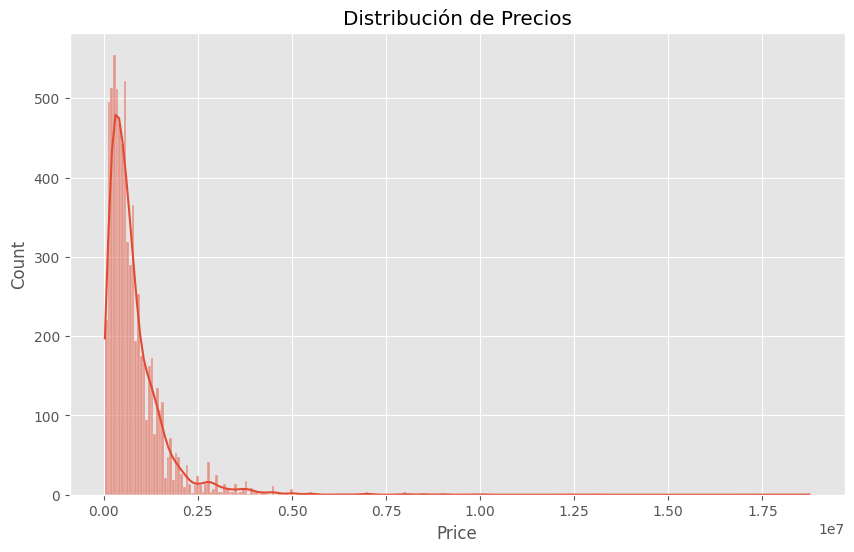


Estadísticas de Price:
count        7000.00
mean       800118.70
std        844403.67
min         29000.00
25%        310000.00
50%        580000.00
75%        995000.00
max      18750000.00
Name: Price, dtype: object


In [ ]:
#@title Distribución del target (Price)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['Price'], kde=True)
plt.title('Distribución de Precios')
plt.show()

print("\nEstadísticas de Price:")
print(train['Price'].describe().apply(lambda x: format(x, '.2f')))

## Plan de Prepocesamientos

In [ ]:
#@title 1. Eliminación de columnas redundantes/inútiles:

cols_to_drop = ['Match', 'Construction_Area', 'Id']
train.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [ ]:
#@title 2. Conversión de tipos de datos:

# Función para manejar conversión segura
def safe_convert(series):
    # Manejo especial para Bedrooms
    if series.name == 'Bedrooms':
        series = series.replace({'5+': '5', 'Not specified': np.nan})

    # Convertir a numérico (los no convertibles serán NaN)
    return pd.to_numeric(series, errors='coerce')

# Columnas a convertir
convert_cols = ['Age', 'Total_Area_m2', 'Bedrooms', 'Number_Floors']

for col in convert_cols:
    if col in train.columns:
        train[col] = safe_convert(train[col])
    if col in test.columns:
        test[col] = safe_convert(test[col])

In [ ]:
#@title 3. Manejo de valores faltantes - Primera pasada

# Identificar columnas categóricas y numéricas
categorical_cols = train.select_dtypes(include='object').columns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Para las numéricas, excluimos el target (Price) si existe
if 'Price' in numeric_cols:
    numeric_cols = numeric_cols.drop('Price')

# Imputación básica para evitar pérdida masiva de datos
for col in train.columns:
    if col in categorical_cols:
        # Categóricas: Nueva categoría "MISSING"
        train[col].fillna('MISSING', inplace=True)
        test[col].fillna('MISSING', inplace=True)
    elif col in numeric_cols:
        # Numéricas: Imputar con mediana (calculada solo con train)
        median_val = train[col].median()
        train[col].fillna(median_val, inplace=True)
        test[col].fillna(median_val, inplace=True)


/tmp/ipython-input-12-4109793501.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('MISSING', inplace=True)
/tmp/ipython-input-12-4109793501.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
#@title 4. Ingeniería de características

# Convertir fecha y extraer características
for df in [train, test]:
    if 'Publication_Date' in df.columns:
        df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], errors='coerce')
        df['Publication_Year'] = df['Publication_Date'].dt.year
        df['Publication_Month'] = df['Publication_Date'].dt.month
        df['Publication_Day'] = df['Publication_Date'].dt.day
        df.drop(columns='Publication_Date', inplace=True)

# Actualizar listas de columnas
categorical_cols = train.select_dtypes(include='object').columns

/tmp/ipython-input-13-1118833935.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], errors='coerce')
/tmp/ipython-input-13-1118833935.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], errors='coerce')


In [ ]:
#@title 5. Reducción de cardinalidad

high_card_cols = ['Advertiser', 'Location', 'District']

for col in high_card_cols:
    if col in train.columns:
        # Calcular frecuencia de categorías en train
        freq = train[col].value_counts(normalize=True)
        # Identificar categorías raras (<1% de frecuencia)
        rare_categories = freq[freq < 0.01].index
        # Reemplazar categorías raras por 'OTRO'
        train[col] = train[col].replace(rare_categories, 'OTRO')
    if col in test.columns:
        # Reemplazar categorías raras por 'OTRO'
        test[col] = test[col].replace(rare_categories, 'OTRO')


In [ ]:
#@title 6. Transformación del target

# Manejar valores no positivos
if 'Price' in train.columns:
    print(f"Propiedades con precio <=0: {len(train[train['Price'] <= 0])}")
    train = train[train['Price'] > 0].copy()
    train['Log_Price'] = np.log1p(train['Price'])
    train.drop(columns='Price', inplace=True)
else:
    print("⚠️ Advertencia: La columna 'Price' no está en los datos de entrenamiento")

Propiedades con precio <=0: 0


In [ ]:
#@title 7. Separar características y target antes de la codificación

if 'Log_Price' in train.columns:
    y = train['Log_Price']
    X_train = train.drop(columns=['Log_Price'])
else:
    y = None
    X_train = train.copy()

X_test = test.copy()

# Identificar columnas categóricas y numéricas
categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
#@title 8. Codificación de variables categóricas con ColumnTransformer

# Preprocesador para manejar diferentes tipos de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
print("\n🔍 Aplicando transformaciones con ColumnTransformer...")
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# SOLUCIÓN AL ERROR: Obtener nombres de características automáticamente
feature_names = preprocessor.get_feature_names_out()

# Crear DataFrames con las características transformadas
X_train_processed = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_preprocessed, columns=feature_names)


🔍 Aplicando transformaciones con ColumnTransformer...


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Publication_Year' 'Publication_Month' 'Publication_Day']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Publication_Year' 'Publication_Month' 'Publication_Day']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
#@title 9. Manejo final de NaN y escalado

# Verificar y manejar NaN restantes
print("\n🔍 Diagnóstico de NaN después de preprocesamiento:")
print(f"NaN en train: {X_train_processed.isnull().sum().sum()}")
print(f"NaN en test: {X_test_processed.isnull().sum().sum()}")

# Si aún hay valores NaN, usamos SimpleImputer como respaldo
if X_train_processed.isnull().sum().sum() > 0 or X_test_processed.isnull().sum().sum() > 0:
    print("⚠️ Se detectaron valores NaN después del preprocesamiento. Aplicando imputación final...")
    imputer = SimpleImputer(strategy='median')
    X_train_imputed = imputer.fit_transform(X_train_processed)
    X_test_imputed = imputer.transform(X_test_processed)

    X_train_processed = pd.DataFrame(X_train_imputed, columns=feature_names)
    X_test_processed = pd.DataFrame(X_test_imputed, columns=feature_names)

# Recuperar el target si existe
if y is not None:
    X_train_processed['Log_Price'] = y.values

# Escalado de características
print("\n🔍 Aplicando escalado de características...")
scaler = StandardScaler()
if 'Log_Price' in X_train_processed.columns:
    X_train_scaled = scaler.fit_transform(X_train_processed.drop(columns='Log_Price'))
else:
    X_train_scaled = scaler.fit_transform(X_train_processed)

X_test_scaled = scaler.transform(X_test_processed)

print("\n✅ Preprocesamiento completado")
print(f"📊 Dimensiones - Train: {X_train_scaled.shape}, Test: {X_test_scaled.shape}")



🔍 Diagnóstico de NaN después de preprocesamiento:
NaN en train: 0
NaN en test: 0

🔍 Aplicando escalado de características...

✅ Preprocesamiento completado
📊 Dimensiones - Train: (7000, 549), Test: (657, 549)


## Entrenamiento del model

In [ ]:
#@title 10. División de datos y entrenamiento del modelo

if y is not None and X_train_scaled.shape[0] > 0:
    # Extraer target si está en el DataFrame procesado
    if 'Log_Price' in X_train_processed.columns:
        y_final = X_train_processed['Log_Price'].values

    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_scaled,
        y_final,
        test_size=0.2,
        random_state=42
    )

    # Construcción del modelo
    print("\n🔍 Construyendo modelo de red neuronal...")
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(0.001), loss='mse')

    # Callback para early stopping
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Entrenamiento del modelo
    print("\n⏳ Entrenando modelo...")
    history = model.fit(
        X_train_split, y_train_split,
        validation_data=(X_val_split, y_val_split),
        epochs=100,
        batch_size=64,
        callbacks=[early_stop],
        verbose=1
    )


🔍 Construyendo modelo de red neuronal...

⏳ Entrenando modelo...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 75.4788 - val_loss: 12.0534
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1921 - val_loss: 2.7153
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2365 - val_loss: 0.7001
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8140 - val_loss: 0.5471
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6606 - val_loss: 0.5217
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5653 - val_loss: 0.4938
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3536 - val_loss: 0.4992
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2334 - val_loss: 0.5538
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3261 - val_loss: 0.3995
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1786 - val_loss: 0.3651
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1371 - val_loss: 0.3959
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

📈 Métricas de Evaluación:
R2 Score: 0.5657
RMSE: 498411.55
MAE: 264550.90
MAPE: 37.19%


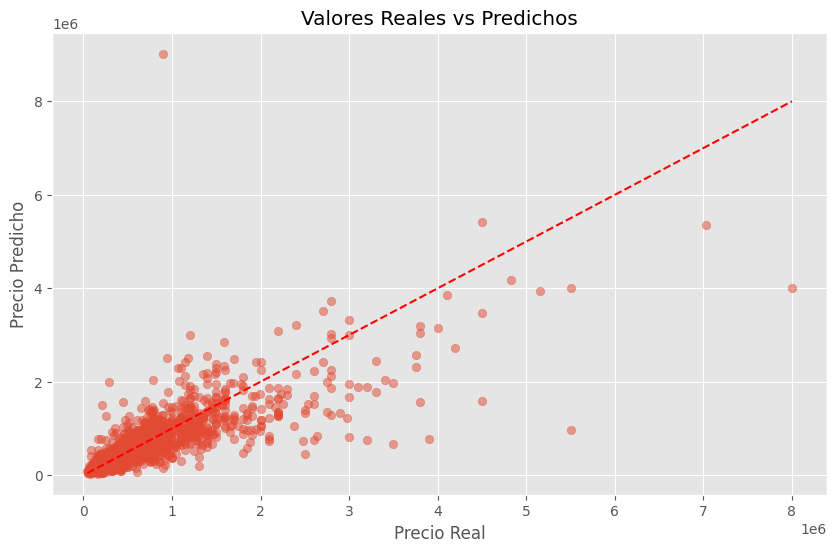

In [ ]:
#@title 11. Evaluación del modelo

if X_val_split.size > 0:
        y_val_pred_log = model.predict(X_val_split).flatten()

        # Convertir a escala original
        y_val_orig = np.expm1(y_val_split)
        y_val_pred = np.expm1(y_val_pred_log)

        # Eliminar NaN/Inf
        valid_mask = ~(np.isnan(y_val_orig) | np.isinf(y_val_orig) |
                      np.isnan(y_val_pred) | np.isinf(y_val_pred))

        if valid_mask.any():
            y_val_orig = y_val_orig[valid_mask]
            y_val_pred = y_val_pred[valid_mask]

            r2 = r2_score(y_val_orig, y_val_pred)
            mse = mean_squared_error(y_val_orig, y_val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_orig, y_val_pred)

            # Calcular MAPE de forma segura
            with np.errstate(divide='ignore', invalid='ignore'):
                ape = np.abs((y_val_orig - y_val_pred) / y_val_orig)
                mape = np.nanmean(ape[~np.isinf(ape)]) * 100

            print("\n📈 Métricas de Evaluación:")
            print(f"R2 Score: {r2:.4f}")
            print(f"RMSE: {rmse:.2f}")
            print(f"MAE: {mae:.2f}")
            print(f"MAPE: {mape:.2f}%")

            # Gráfico de dispersión
            plt.figure(figsize=(10, 6))
            plt.scatter(y_val_orig, y_val_pred, alpha=0.5)
            plt.plot([y_val_orig.min(), y_val_orig.max()], [y_val_orig.min(), y_val_orig.max()], 'r--')
            plt.xlabel('Precio Real')
            plt.ylabel('Precio Predicho')
            plt.title('Valores Reales vs Predichos')
            plt.grid(True)
            plt.savefig('real_vs_pred.png', dpi=300)
            plt.show()
        else:
            print("⚠️ No hay datos válidos para evaluación")
else:
    print("⚠️ Conjunto de validación vacío")